# Cat Vs Dog  - VGG16 Pre Trained Model (Transfer Learning)

Download Datasets: https://www.kaggle.com/c/dogs-vs-cats/data


***NOTE: IF YOU JUST DOWNLOADED DATA, FIRST RUN THIS FOR IMAGE MANIPULATION:  "Copying images for CNN Examples.ipynb"***

In [69]:
import os, numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

### Instantiating the VGG16 convolutional base

In [4]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 142s 2us/step


In [8]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

### Extracting features using the pretrained convolutional base

In [79]:
base_dir = '/home/selim/Documents/Datasets/CatVsDog/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [80]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [81]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory, 
        target_size=(150, 150), 
        batch_size=batch_size,
        class_mode='binary')
    i=0
    
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    
    return features, labels

#### Extracting features and labels.

In [18]:
train_features, train_labels = extract_features(train_dir, 2000)

Found 2000 images belonging to 2 classes.


In [19]:
validation_features, validation_labels = extract_features(validation_dir, 1000)

Found 1000 images belonging to 2 classes.


In [20]:
test_features, test_labels = extract_features(test_dir, 1000)

Found 1000 images belonging to 2 classes.


#### Reshaping

In [21]:
train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))

###  Defining and training the densely connected classifier

In [22]:
model = models.Sequential()

model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', 
              metrics=['acc'])

In [23]:
history = model.fit(train_features, train_labels, 
                    epochs=30, batch_size=20, 
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 3s 34ms/step - loss: 0.5976 - acc: 0.6710 - val_loss: 0.4572 - val_acc: 0.8100
Epoch 2/30
100/100 [==============================] - 3s 34ms/step - loss: 0.4251 - acc: 0.8180 - val_loss: 0.3681 - val_acc: 0.8540
Epoch 3/30
100/100 [==============================] - 3s 34ms/step - loss: 0.3581 - acc: 0.8570 - val_loss: 0.3233 - val_acc: 0.8810
Epoch 4/30
100/100 [==============================] - 3s 34ms/step - loss: 0.3144 - acc: 0.8740 - val_loss: 0.2987 - val_acc: 0.8870
Epoch 5/30
100/100 [==============================] - 3s 32ms/step - loss: 0.2895 - acc: 0.8830 - val_loss: 0.2841 - val_acc: 0.8930
Epoch 6/30
100/100 [==============================] - 3s 31ms/step - loss: 0.2670 - acc: 0.8940 - val_loss: 0.2740 - val_acc: 0.8920
Epoch 7/30
100/100 [==============================] - 3s 33ms/step - loss: 0.2370 - acc: 0.9110 - val_loss: 0.2680 - val_acc: 0.8910
Epoch 8/30
100/100 [==============================] - 3s 33ms/step - 

In [24]:
model.save('catVsDogVgg16.h5')

###  Plotting the results

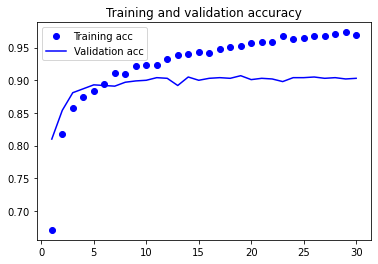

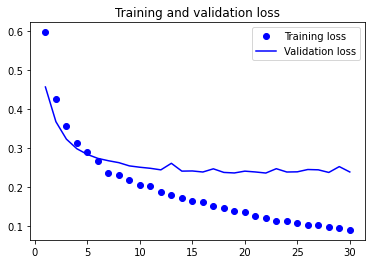

In [25]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend();

### Image Pre Processing for Recognization

(1, 64, 64, 3)
[[0.99052376]]
0


'Cat'

In [16]:
model_cat_dog.predict_classes(img)

array([[1]], dtype=int32)